In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# add base data path
data_path = os.getcwd() + "/results/"

# add single dataset
df_names = [
    "alberta-based-v2",
    "bert-base-uncased",
    "bert-large-uncased",
    "gemma-7B",
    "llama2-7B",
    "roberta-base",
    "roberta-large"
]

# Use a dictionary comprehension to load all datasets
df_list = {name: pd.read_csv(f"{data_path}{name}.csv") for name in df_names}


### Average Performance

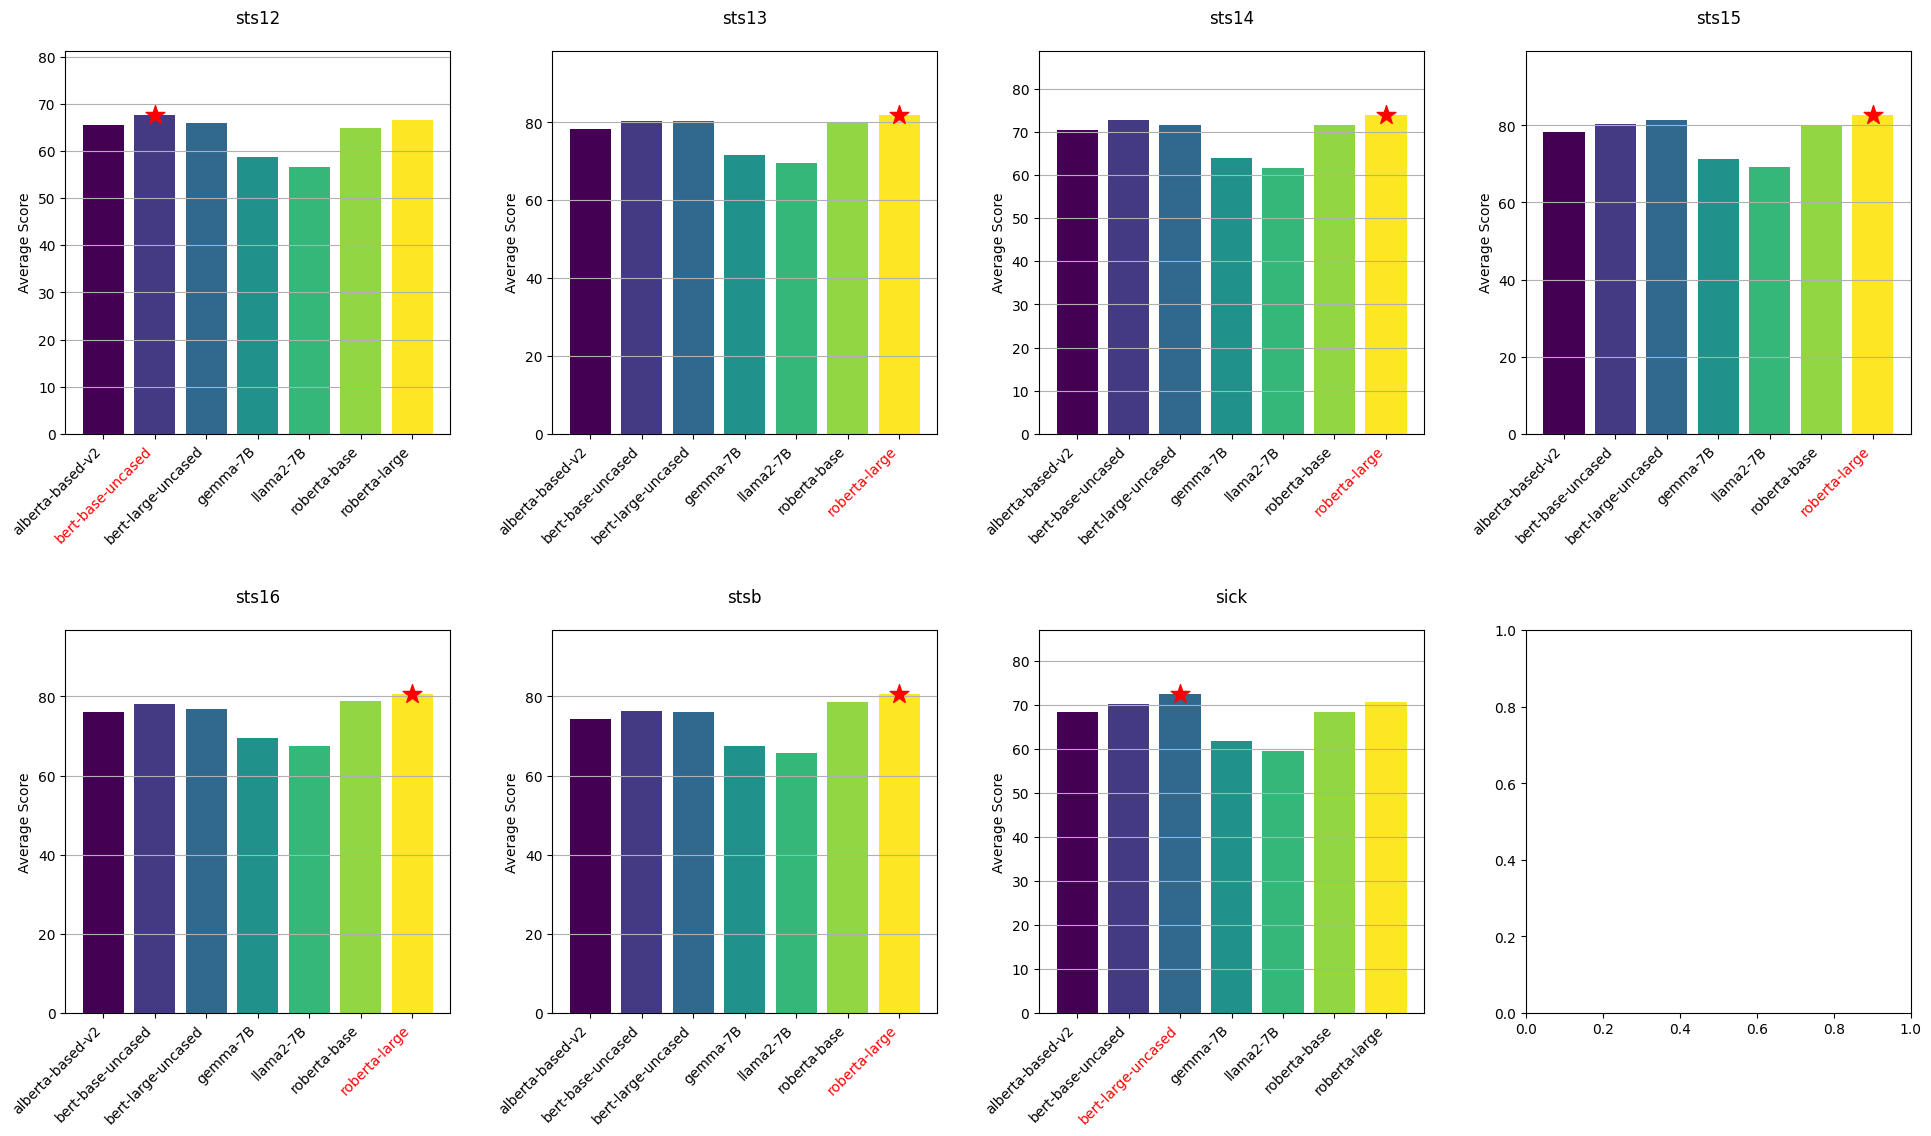

In [3]:
# Define the tasks to plot
tasks = ['sts12', 'sts13', 'sts14', 'sts15', 'sts16', 'stsb', 'sick']
n_tasks = len(tasks)

# Set up the subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, task in enumerate(tasks):
    # Calculate the mean score for each model on the task
    scores = [df[task].mean() for df in df_list.values()]
    
    # Identify the highest score and its index for placing the star and changing tick color
    highest_score = max(scores)
    highest_index = scores.index(highest_score)
    
    # Calculate standard deviations for highlighting later
    std_devs = [df[task].std() for df in df_list.values()]
    
    # Plot the bars in the current subplot
    bars = axes[i].bar(df_names, scores, color=plt.cm.viridis(np.linspace(0, 1, len(df_names))))
    axes[i].set_title(f'{task}', pad=20)
    axes[i].set_ylabel('Average Score')
    
    # Rotate x-axis tick labels and set the color of the highest bar's label to red
    axes[i].set_xticks(range(len(df_names)))
    axes[i].set_xticklabels(df_names, rotation=45, ha="right")
    for label in axes[i].get_xticklabels():
        label.set_color('black')  # Reset colors
    axes[i].get_xticklabels()[highest_index].set_color('red')  # Set the color of the highest bar's label to red
    
    axes[i].grid(axis='y')
    
    # Add a red star at the highest bar
    axes[i].scatter(highest_index, highest_score, color='red', s=200, marker='*', zorder=5)
    
    # Adjust ylim to add more white space on the top
    axes[i].set_ylim(0, highest_score * 1.2)
    
# Adjust the layout to prevent overlap and ensure clarity
plt.tight_layout(pad=3.0)
plt.show()


In [4]:
mean_scores_data = {task: [df[task].mean() for df in df_list.values()] for task in tasks}

# Create a DataFrame from the dictionary
mean_scores_df = pd.DataFrame(mean_scores_data, index=df_names)

# Highlighting the most robust (lowest std dev) cells
def highlight_min(s):
    '''
    Highlight the max in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Display the DataFrame
mean_scores_df_styled = mean_scores_df.style.apply(highlight_min)
mean_scores_df_styled

,sts12,sts13,sts14,sts15,sts16,stsb,sick
alberta-based-v2,65.595430,78.372666,70.363729,78.195756,76.058694,74.210192,68.364721
bert-base-uncased,67.644819,80.424152,72.683877,80.247040,78.118291,76.281789,70.346418
bert-large-uncased,65.825490,80.441564,71.602235,81.453165,76.846042,75.963023,72.517727
gemma-7B,58.636461,71.600204,64.006215,71.152682,69.600229,67.356714,61.807556
llama2-7B,56.512006,69.609443,61.711329,69.217648,67.368911,65.690872,59.473813
roberta-base,64.920905,80.063749,71.517796,79.920514,78.732900,78.674828,68.392137
roberta-large,66.464714,81.927801,73.929494,82.710892,80.582071,80.571855,70.815224


### Robustness

In [5]:
# Create a DataFrame for standard deviations
std_dev_df = pd.DataFrame({task: [df[task].std() for df in df_list.values()] for task in tasks}, index=df_names)

# Highlighting the most robust (lowest std dev) cells
def highlight_min(s):
    '''
    Highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# Display the table with highlights
std_dev_df_styled = std_dev_df.style.apply(highlight_min)
std_dev_df_styled

,sts12,sts13,sts14,sts15,sts16,stsb,sick
alberta-based-v2,1.979728,1.334766,1.648390,1.546945,1.398276,1.582308,1.448221
bert-base-uncased,1.506046,1.326711,1.253653,1.017443,0.873472,1.117235,0.972967
bert-large-uncased,2.102284,2.219381,2.469802,1.591522,1.601240,1.969047,1.982168
gemma-7B,2.281308,2.543807,1.851356,1.931323,1.805623,2.294816,1.855862
llama2-7B,2.082359,1.847103,1.924103,1.715339,1.377255,1.543908,1.495581
roberta-base,0.600229,0.381531,0.309034,0.353593,0.274182,0.323476,0.422850
roberta-large,0.996489,0.698363,0.675061,0.568832,0.426473,0.674530,0.971363
